In [20]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


In [21]:
# TODO: Calcule o número de estudante
n_students = student_data.shape[0]

# TODO: Calcule o número de atributos
n_features = student_data.shape[1] - 1

# TODO: Calcule o número de alunos aprovados

n_passed = student_data[student_data['passed']=='yes'].shape[0]

# TODO: Calcule o número de alunos reprovados
n_failed = student_data[student_data['passed']=='no'].shape[0]

# TODO: Calcule a taxa de graduação
passou = float(n_passed * 1.00)
allstudantes = float(n_students * 1.00)

grad_rate = ( passou / allstudantes ) * 100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


In [22]:
target_coluna = (student_data.columns[-1])
target_coluna = (student_data.columns[30:31])

In [23]:
# Extraia as colunas dos atributos
feature_coluna = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
#Desta forma o nome da coluna é ignorado
#target_col = student_data.columns[-1] 
target_coluna = student_data.columns[30:31] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_coluna)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_coluna]
y_all = student_data[target_coluna]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: Index([u'passed'], dtype='object')

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    

In [24]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

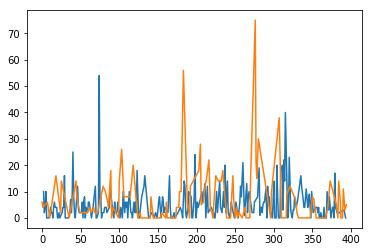

In [25]:
plotYes = student_data[student_data['passed']=='yes']['absences']
plotYes.plot()
plotNot = student_data[student_data['passed']=='no']['absences']
plotNot.plot()

In [36]:
# Extraia as colunas dos atributos
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
#Desta forma o nome da coluna é ignorado
#target_col = student_data.columns[-1] 
target_col = student_data.columns[30:31] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: Index([u'passed'], dtype='object')

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    

In [38]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
y_all = preprocess_features(y_all)

print "Processed feature columns ({} total features):\n{}".format(len(y_all.columns), list(y_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Processed feature columns (1 total features):
['passed']


In [40]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn import cross_validation
# TODO: Estabeleça o número de pontos de treinamento
num_train = 300 # 75% dos dados

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X_all,y_all,test_size=num_test)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


In [46]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label=1)




def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train.values.ravel())
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [47]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# TODO: Inicialize os três modelos
clf_A = GaussianNB()
clf_B = SVC(random_state=0)
clf_C = LogisticRegression(random_state=0)

# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)
for clf in [clf_A, clf_B, clf_C]:
    print "Treinando " + str(clf) + "\n"
    for n_train in [100, 200, 300]:
        train_predict(clf, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print "\n"
    print "\n\n"

Treinando GaussianNB(priors=None)

Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0041 segundos
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de treino: 0.2222.
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de teste: 0.3488.


Treinando um GaussianNB com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0011 segundos
As previsões foram feitas em 0.0006 segundos.
Pontuação F1 para o conjunto de treino: 0.8132.
As previsões foram feitas em 0.0004 segundos.
Pontuação F1 para o conjunto de teste: 0.7338.


Treinando um GaussianNB com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0009 segundos
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de treino: 0.8058.
As previsões foram feitas em 0.0005 segundos.
Pontuação F1 para o conjunto de teste: 0.7626.





Treinando SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='o

In [18]:
# Here we fine tune a Decision Tree Classifier 
# we focus of max_depth and min_samles_leaf

from sklearn.cross_validation import KFold
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

def best(classifier, paramdict, X_train, y_train):
    
    kfcv = KFold(n=len(y_train), n_folds=10, shuffle=True)
    
    gs = GridSearchCV(classifier, paramdict, cv=kfcv, scoring='f1')
    
    gs.fit(X_train, y_train)   
    
    return gs.best_estimator_, gs.best_params_

params = {'max_depth':(1,2,3,4,5,6,7,8,9,10), 'min_samples_leaf':(1,2,4,8,16,32,64)}
clf = SVC(random_state=0)
best_model, best_hyperparams = best(clf, params, X_train, y_train)

print "Optimal hyperparameters: {}".format(best_hyperparams)

ValueError: Invalid parameter max_depth for estimator SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.